In [1]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-11-22 01:49:33--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.14, 52.95.149.42, 3.5.246.13, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  16.1MB/s    in 1.7s    

2023-11-22 01:49:36 (16.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
#cv2.resize(image,dsize(output image size),x scale,y scale, interpolation)

In [3]:
# source: Input Image array (Single-channel, 8-bit or floating-point)
# dsize: Size of the output array
# dest: Output array (Similar to the dimensions and type of Input image array) [optional]
# fx: Scale factor along the horizontal axis  [optional]
# fy: Scale factor along the vertical axis  [optional]
# interpolation: One of the above interpolation methods  [optional]

In [4]:
# INTER_NEAREST − A nearest-neighbor interpolation.

# INTER_LINEAR − A bilinear interpolation (used by default)

# INTER_AREA − Resampling using pixel area relation. It is a preferred method for image
  #decimation but when the image is zoomed, it is similar to the INTER_NEAREST method.

# INTER_CUBIC − A bicubic interpolation over 4x4 pixel neighborhood

# INTER_LANCZOS4 − A Lanczos interpolation over 8x8 pixel neighborhood

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
# define our imshow function

def imshow(title = "Image",image = None,size = 7):

  w,h = image.shape[0],image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [12]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg")
imshow("Scaling linear interpolation ",image)

# if no interpolation is used the it considers by default Linear INnterpolation
image_scaled = cv2.resize(image,None,fx = 0.75,fy = 0.75)
imshow("0.75x scaling - Linear Interpolation",image_scaled)

# lets double the size of image
image_scaled2 = cv2.resize(image,None,fx = 2,fy = 2,interpolation = cv2.INTER_CUBIC )
imshow("2x scaling - INTER CUBIC ",image_scaled2)

# lets double the size of image
image_scaled3 = cv2.resize(image,None,fx = 2,fy = 2,interpolation = cv2.INTER_NEAREST )
imshow("2x scaling -INTER_NEAREST ",image_scaled3)

Output hidden; open in https://colab.research.google.com to view.

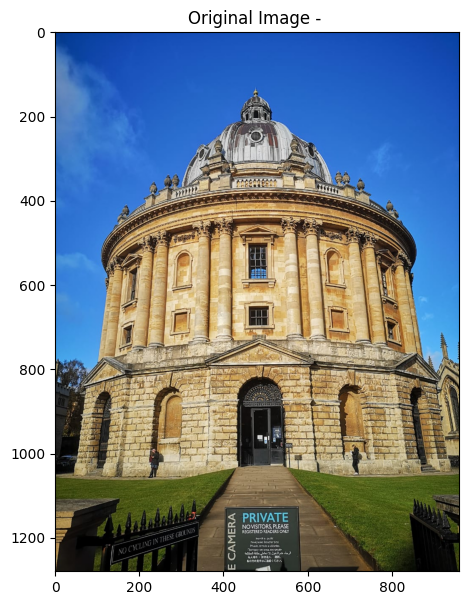

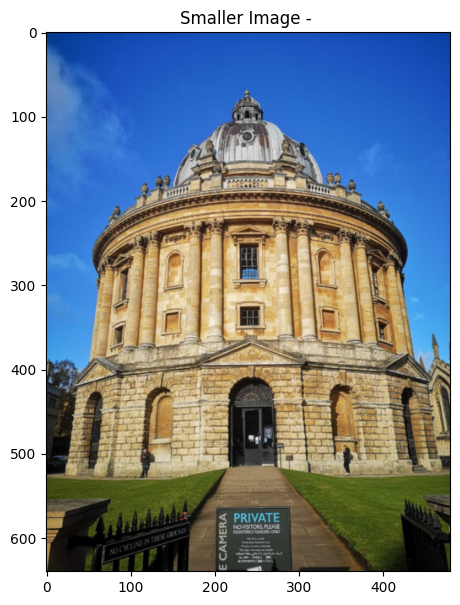

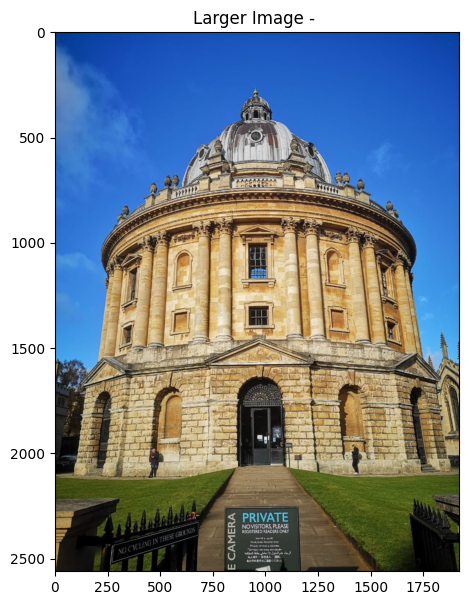

In [14]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg")

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(image)


imshow("Original Image - ",image)
imshow("Smaller Image - ",smaller)
imshow("Larger Image - ",larger)

# Cropping

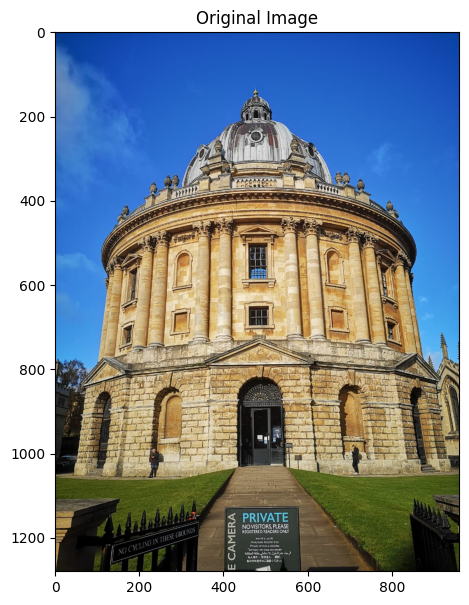

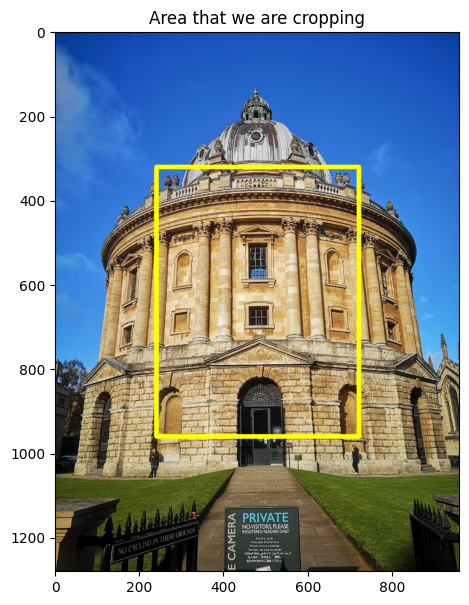

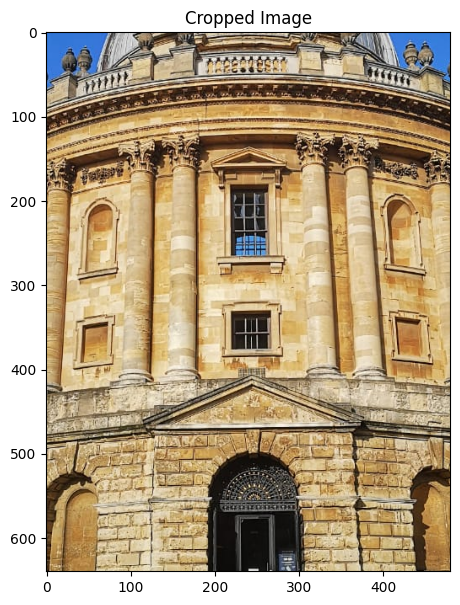

In [20]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg")

height,width = image.shape[:2]

start_row ,start_col = int(height*0.25),int(width*0.25)
end_row ,end_col = int(height*0.75),int(width*0.75)

imshow("Original Image",image)

cropped = image[start_row:end_row ,start_col:end_col]

copy = image.copy()
cv2.rectangle(copy,(start_col,start_row),(end_col,end_row),(0,255,255),10)

imshow("Area that we are cropping",copy )

imshow("Cropped Image",cropped )